In [2]:
from edc import setup_environment_variables
setup_environment_variables()

API credentials have automatically been injected for your active subscriptions.  
The following environment variables are now available:
* `SH_CLIENT_NAME`
* `SH_CLIENT_SECRET`
* `SH_INSTANCE_ID`
* `SH_CLIENT_ID`
* `MY_AWS_BUCKET`
* `MY_OGC_EDC_URL`


## Important notes
This notebook requires:
- OGC layer installed in EDC marketplace (with access url exposed as environment variable MY_OGC_EDC_URL)

# OGC-EDC example calls

This Notebook containes some WMs calls for the generated and configured EGC_OGC URL, all the presented samples where taken from 
pre-configured collecions and layers.

The wms layers were simply requested using the python `requests` library, and the desired parameters were set to exploit *EDC-OGC* backend potentials


Below is a comparison between a True Color image (Top) and a NDVI image (Bottom) of Sentinel 2 L1C

In [3]:
import requests
from IPython.display import Image, display

# api-endpoint 
URL = %env MY_OGC_EDC_URL
  
PARAMS_1 = {
    'service': 'WMS',
    'version': '1.3.0',
    'request': 'GetMap',
    'layers': 'S2L1C__TRUECOLOR',
    'bbox': '-15.759545,46.269951,-15.698739,46.426163',
    'crs': 'EPSG:4326',
    'styles': '',
    'width': 1000,
    'height': 500,
    'format': 'image/png',
    'time' : '',
}
  
PARAMS_2 = {
    'service': 'WMS',
    'version': '1.3.0',
    'request': 'GetMap',
    'layers': 'L8L1C__NDVI',
    'bbox': '-15.759545,46.269951,-15.698739,46.426163',
    'crs': 'EPSG:4326',
    'styles': 'EOX NDVI Colorscale',
    'width': 1000,
    'height': 500,
    'format': 'image/png',
    'time' : '',
}

In [4]:
r_1 = requests.get(url = URL, params = PARAMS_1, stream=all) 
r_2= requests.get(url = URL, params = PARAMS_2, stream=all)


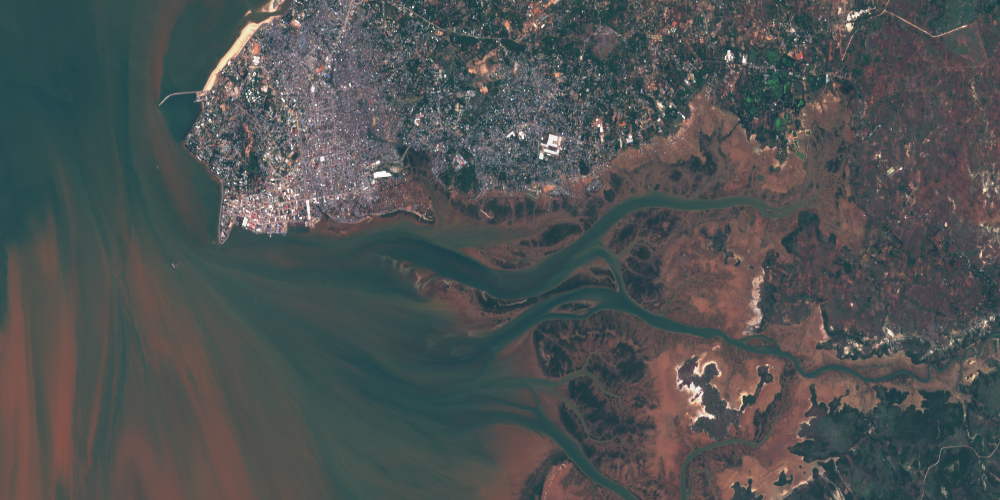

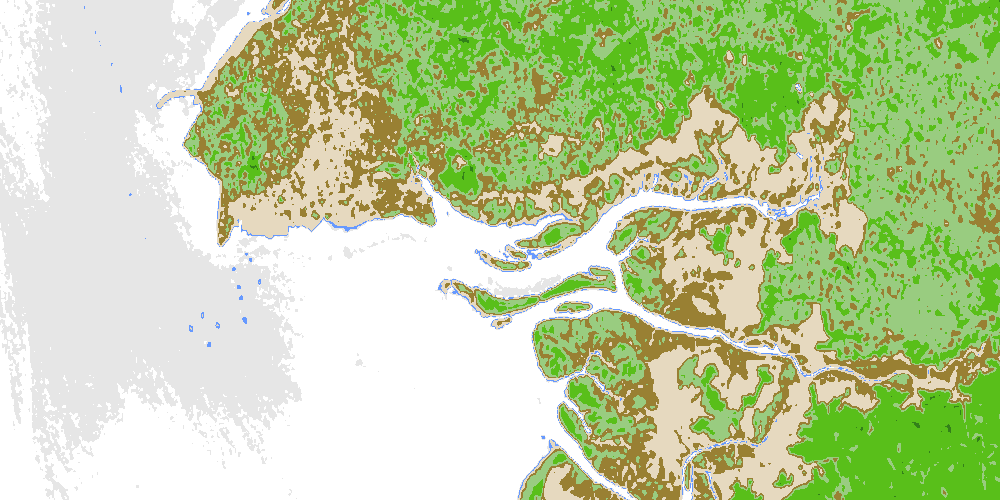

In [5]:

display(Image(r_1.content))

display(Image(r_2.content))





users can set the required cloud coverage to filter out cloud, jsut by setting the cloud coverage parameter 'maxcc'.
below is a comparison between a 100% cloud coverage image  and a 50% cloud coverage

In [6]:
PARAMS_3 = {
    'service': 'WMS',
    'version': '1.3.0',
    'request': 'GetMap',
    'layers': 'S2L1C__TRUECOLOR',
    'bbox': '1466647.93,6036752.61,1517415.19,6052309.71',
    'crs': 'EPSG:3857',
    'styles': '',
    'width': 1000,
    'height': 300,
    'format': 'image/png',
    'time' : '',
    'maxcc': '100'
} 

PARAMS_4 = {
    'service': 'WMS',
    'version': '1.3.0',
    'request': 'GetMap',
    'layers': 'S2L1C__TRUECOLOR',
    'bbox': '1466647.93,6036752.61,1517415.19,6052309.71',
    'crs': 'EPSG:3857',
    'styles': '',
    'width': 1000,
    'height': 300,
    'format': 'image/png',
    'time' : '',
    'maxcc': '50'
}  

In [7]:
a_1 = requests.get(url = URL, params = PARAMS_3, stream=all) 
a_2= requests.get(url = URL, params = PARAMS_4, stream=all) 

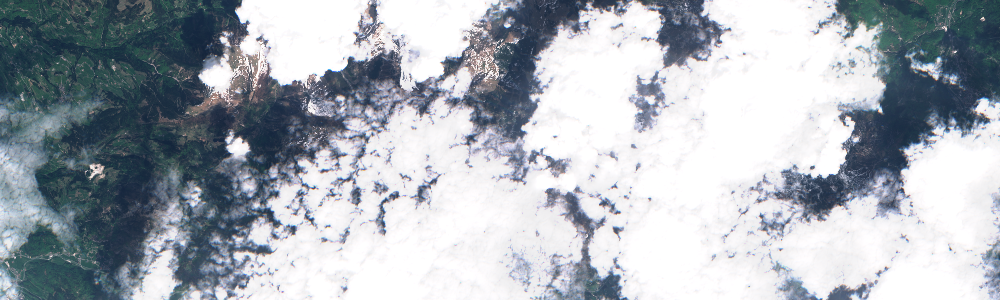

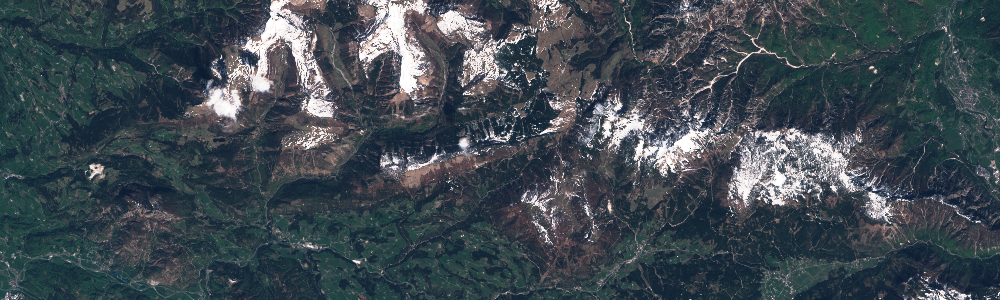

In [8]:
display(Image(a_1.content))

display(Image(a_2.content))


below is S5 dataset

In [9]:
PARAMS_3 = {
    'service': 'WMS',
    'version': '1.3.0',
    'request': 'GetMap',
    'layers': 'S5PL2__NO2',
    'bbox': '45,-11.25,56.25,0',
    'crs': 'EPSG:4326',
    'styles': '',
    'width': 512,
    'height': 512,
    'format': 'image/png',
    'time' : '2020-04-21/2020-04-26',
    'maxcc': '100'
}

In [12]:
a = requests.get(url = URL, params = PARAMS_3, stream=all)

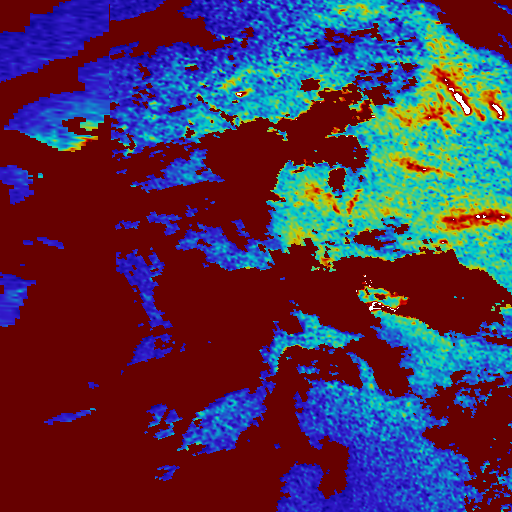

In [13]:
display(Image(a.content))